# EMAIL SPAM DETECTION WITH MACHINE LEARNING

## importing libraries

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


/home/rgukt/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [21]:
data=pd.read_csv("/home/rgukt/Desktop/infobyte/email.csv")

/tmp/ipykernel_4902/1633011387.py:1: DtypeWarning: Columns (63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("/home/rgukt/Desktop/infobyte/email.csv")


In [4]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ham,Ok,lar...,Joking,wif,u,oni...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,spam,Free,entry,in,2,a,wkly,comp,to,win,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ham,U,dun,say,so,early,hor...,U,c,already,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5568,ham,Will,�_,b,going,to,esplanade,fr,home?,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5570,ham,The,guy,did,some,bitching,but,I,acted,like,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       ...
       'Unnamed: 162', 'Unnamed: 163', 'Unnamed: 164', 'Unnamed: 165',
       'Unnamed: 166', 'Unnamed: 167', 'Unnamed: 168', 'Unnamed: 169',
       'Unnamed: 170', 'Unnamed: 171'],
      dtype='object', length=172)

In [23]:
print(data.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                                                 Ok     lar...   
2  spam                                               Free      entry   
3   ham                                                  U        dun   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1     Joking        wif          u     oni...        NaN        NaN   
2         in          2          a       wkly       comp         to   
3        say         so      early     hor...          U          c   
4        NaN        NaN        NaN        NaN        NaN        NaN   

  Unnamed: 9  ... Unnamed: 162 Unnamed: 163 Unnamed: 164 Unnamed: 165  \
0        NaN  ...          NaN          NaN          NaN     

In [77]:
data.tail()

,label,text,text_length
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will,4
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The,3
5571,ham,Rofl.,5


In [24]:
data.shape

(5572, 172)

In [25]:
data.drop_duplicates(inplace=True)
print(data.shape)

(5161, 172)


In [26]:
data.isnull().sum()

v1                 0
v2                 8
Unnamed: 2      1256
Unnamed: 3      1305
Unnamed: 4      1379
                ... 
Unnamed: 167    5160
Unnamed: 168    5160
Unnamed: 169    5160
Unnamed: 170    5160
Unnamed: 171    5160
Length: 172, dtype: int64

In [27]:
data.drop_duplicates(inplace=True)
print("Shape after dropping duplicates:", data.shape)

Shape after dropping duplicates: (5161, 172)


In [28]:
# Check for missing values
print("Number of missing values in each column:")
print(data.isnull().sum())


Number of missing values in each column:
v1                 0
v2                 8
Unnamed: 2      1256
Unnamed: 3      1305
Unnamed: 4      1379
                ... 
Unnamed: 167    5160
Unnamed: 168    5160
Unnamed: 169    5160
Unnamed: 170    5160
Unnamed: 171    5160
Length: 172, dtype: int64


In [29]:
for column in data.columns:
    print(column)

v1
v2
Unnamed: 2
Unnamed: 3
Unnamed: 4
Unnamed: 5
Unnamed: 6
Unnamed: 7
Unnamed: 8
Unnamed: 9
Unnamed: 10
Unnamed: 11
Unnamed: 12
Unnamed: 13
Unnamed: 14
Unnamed: 15
Unnamed: 16
Unnamed: 17
Unnamed: 18
Unnamed: 19
Unnamed: 20
Unnamed: 21
Unnamed: 22
Unnamed: 23
Unnamed: 24
Unnamed: 25
Unnamed: 26
Unnamed: 27
Unnamed: 28
Unnamed: 29
Unnamed: 30
Unnamed: 31
Unnamed: 32
Unnamed: 33
Unnamed: 34
Unnamed: 35
Unnamed: 36
Unnamed: 37
Unnamed: 38
Unnamed: 39
Unnamed: 40
Unnamed: 41
Unnamed: 42
Unnamed: 43
Unnamed: 44
Unnamed: 45
Unnamed: 46
Unnamed: 47
Unnamed: 48
Unnamed: 49
Unnamed: 50
Unnamed: 51
Unnamed: 52
Unnamed: 53
Unnamed: 54
Unnamed: 55
Unnamed: 56
Unnamed: 57
Unnamed: 58
Unnamed: 59
Unnamed: 60
Unnamed: 61
Unnamed: 62
Unnamed: 63
Unnamed: 64
Unnamed: 65
Unnamed: 66
Unnamed: 67
Unnamed: 68
Unnamed: 69
Unnamed: 70
Unnamed: 71
Unnamed: 72
Unnamed: 73
Unnamed: 74
Unnamed: 75
Unnamed: 76
Unnamed: 77
Unnamed: 78
Unnamed: 79
Unnamed: 80
Unnamed: 81
Unnamed: 82
Unnamed: 83
Unnamed: 84
Unname

In [30]:
label_column = 'v1'  # Replace with the actual column name for labels
text_column = 'v2'

In [31]:
data = data[[label_column, text_column]]

In [33]:
data.columns = ['label', 'text']

In [35]:
# Drop any rows with missing values in these columns
data.dropna(subset=['label', 'text'], inplace=True)



In [36]:
# Display the first few rows of the cleaned dataset to confirm the changes
print("First few rows of the cleaned dataset:")
print(data.head())

First few rows of the cleaned dataset:
  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                                                 Ok
2  spam                                               Free
3   ham                                                  U
4   ham  Nah I don't think he goes to usf, he lives aro...


In [37]:
print("Shape of the cleaned dataset:", data.shape)

Shape of the cleaned dataset: (5153, 2)


In [38]:
print("Number of missing values in each column after cleaning:")
print(data.isnull().sum())

Number of missing values in each column after cleaning:
label    0
text     0
dtype: int64


In [39]:
data.to_csv('cleaned_spam_dataset.csv', index=False)

In [40]:

data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok
2,spam,Free
3,ham,U
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## visualization 

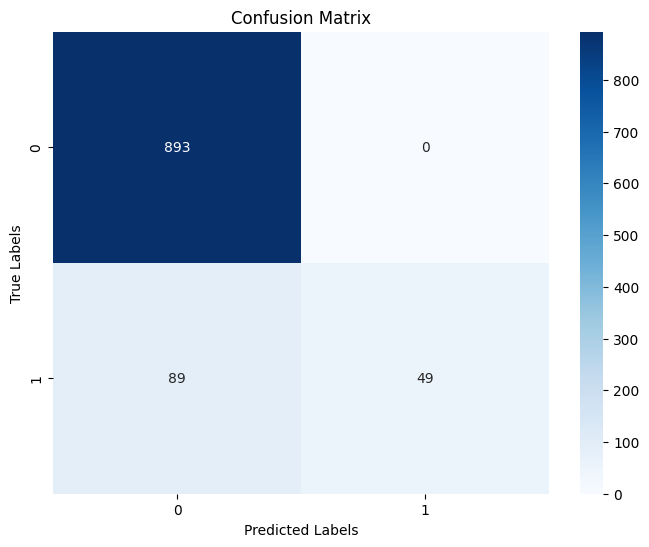

In [74]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


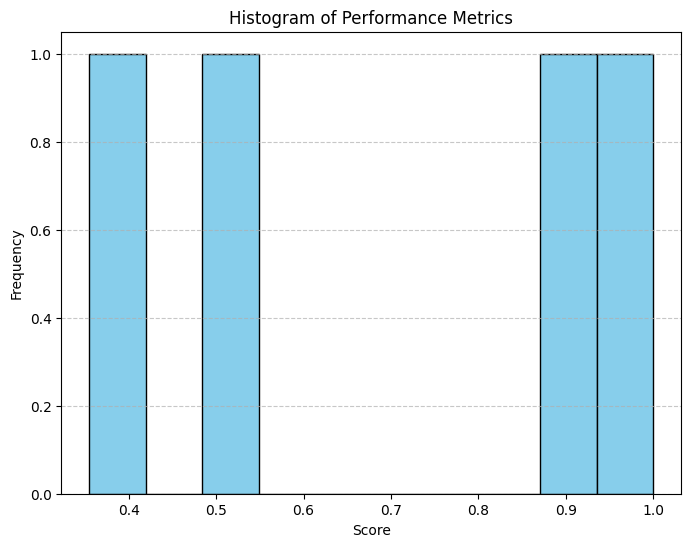

In [78]:
import matplotlib.pyplot as plt

# Define the performance metrics and corresponding scores
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [accuracy, precision, recall, f1]

# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(scores, bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Histogram of Performance Metrics')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


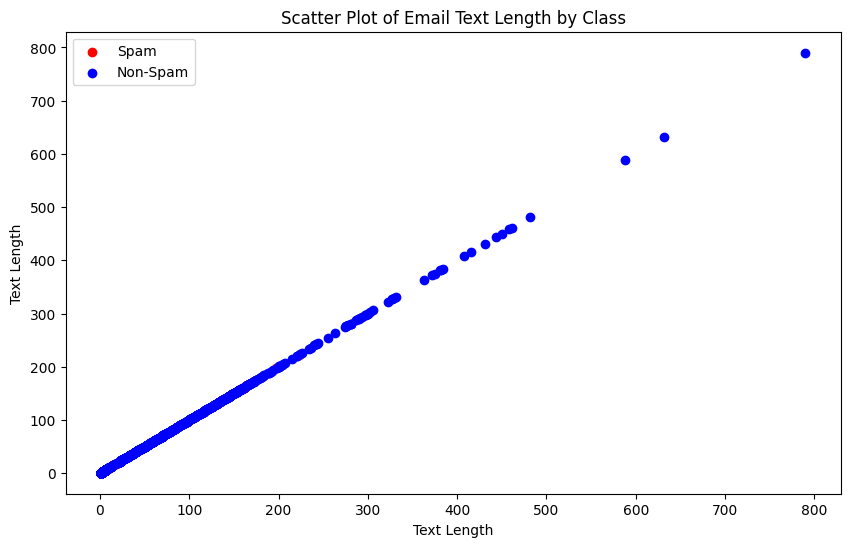

In [71]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data[data['label'] == 'spam']['text_length'], data[data['label'] == 'spam']['text_length'], color='red', label='Spam')
plt.scatter(data[data['label'] == 'ham']['text_length'], data[data['label'] == 'ham']['text_length'], color='blue', label='Non-Spam')
plt.title('Scatter Plot of Email Text Length by Class')
plt.xlabel('Text Length')
plt.ylabel('Text Length')
plt.legend()
plt.show()


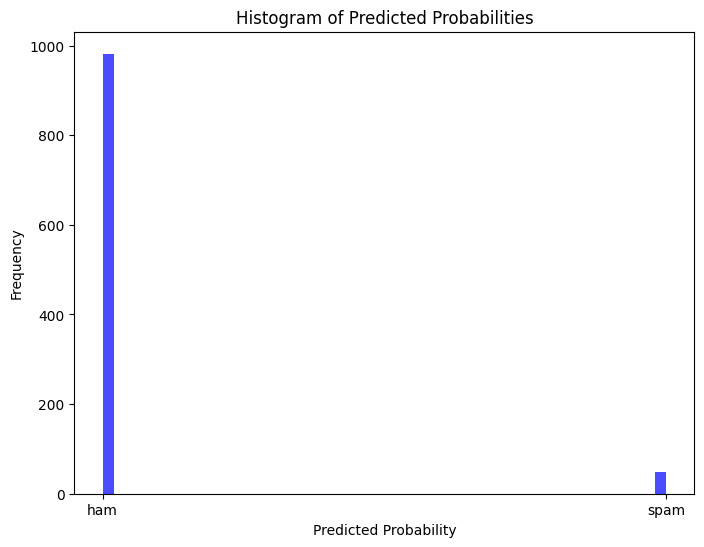

In [60]:
plt.figure(figsize=(8, 6))
plt.hist(y_pred, bins=50, color='blue', alpha=0.7)
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Probabilities')
plt.show()

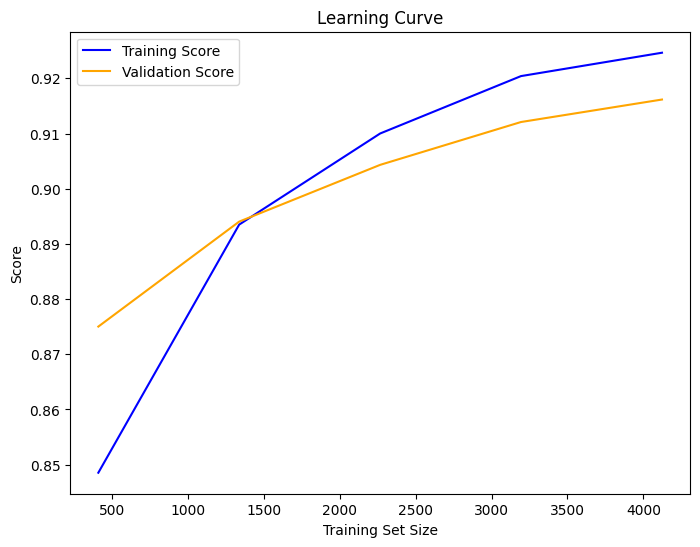

In [67]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score', color='blue')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Score', color='orange')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()


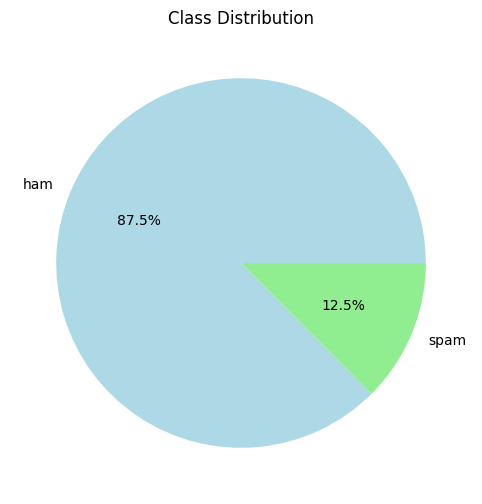

In [68]:
# Calculate the class distribution
class_counts = data['label'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title('Class Distribution')
plt.show()


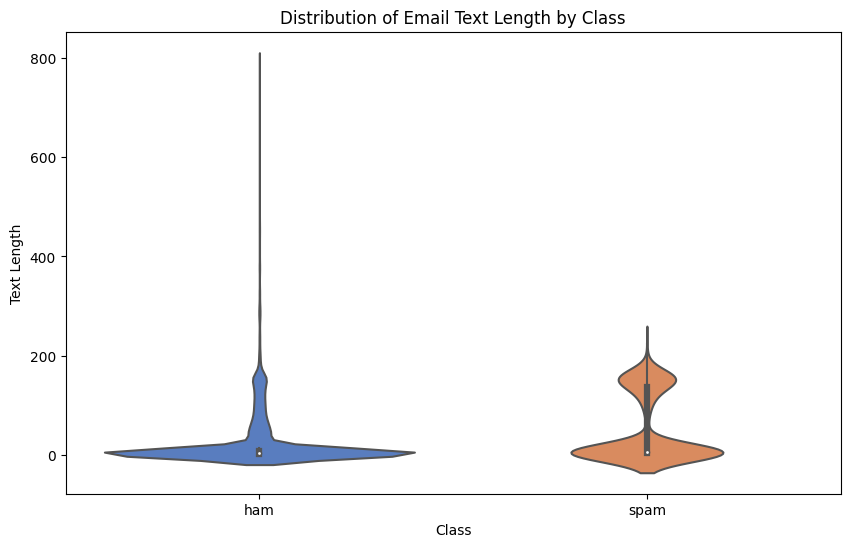

In [69]:
import seaborn as sns

# Assuming 'text' column contains the length of emails
data['text_length'] = data['text'].apply(len)

# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='label', y='text_length', data=data, palette='muted')
plt.title('Distribution of Email Text Length by Class')
plt.xlabel('Class')
plt.ylabel('Text Length')
plt.show()


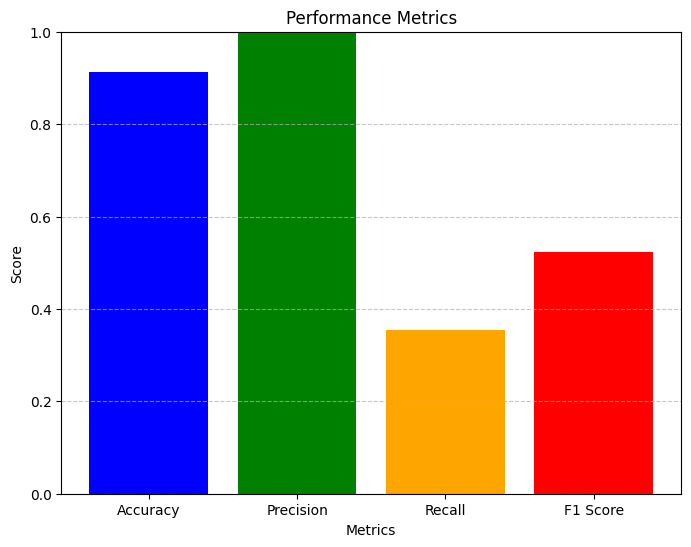

In [76]:
import matplotlib.pyplot as plt

# Define the performance metrics and corresponding scores
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [accuracy, precision, recall, f1]

# Create a bar graph
plt.figure(figsize=(8, 6))
plt.bar(metrics, scores, color=['blue', 'green', 'orange', 'red'])
plt.title('Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set the y-axis limit from 0 to 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Vectorize the text data


In [41]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['text'])
y = data['label']


### Split the data into training and testing sets

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train a Naive Bayes classifier

In [43]:
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [44]:
y_pred = model.predict(X_test)

### Evaluate the model

In [45]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='spam')
recall = recall_score(y_test, y_pred, pos_label='spam')
f1 = f1_score(y_test, y_pred, pos_label='spam')


In [72]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9137
Precision: 1.0000
Recall: 0.3551
F1 Score: 0.5241


In [48]:
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9137
